# 📚 Python에서 `List`와 `list[str]`의 차이점

## 1. 기본 개념

### `list[str]` (소문자)
- Python의 **내장 타입** (built-in type)
- 실제 리스트 객체를 생성하는 클래스
- Python 3.0부터 사용 가능

### `List` (대문자)
- `typing` 모듈에서 제공하는 **제네릭 타입**
- 타입 힌트(Type Hint)용으로 사용
- Python 3.5부터 사용 가능

## 2. 사용 목적

### `list[str]` - 실제 객체 생성
```python
my_list[str] = list[str]([1, 2, 3])  # 실제 리스트 객체 생성
my_list[str] = [1, 2, 3]        # 리스트 리터럴
```

### `List` - 타입 힌트
```python
from typing import List

def process_numbers(numbers: List[int]) -> List[str]:
    return [str(n) for n in numbers]
```

## 3. Python 버전별 변화

### Python 3.9 이전
```python
from typing import List, Dict
numbers: List[int] = [1, 2, 3]
```

### Python 3.9 이후 (권장)
```python
numbers: list[str][int] = [1, 2, 3]  # 내장 타입으로 직접 사용 가능
```

## 📋 요약 정리

### 핵심 차이점

| 구분 | `list[str]` (소문자) | `List` (대문자) |
|------|----------------|----------------|
| **정의** | Python 내장 타입 | typing 모듈의 제네릭 타입 |
| **용도** | 실제 객체 생성 | 타입 힌트 전용 |
| **사용 시기** | Python 3.0+ | Python 3.5+ (타입 힌트) |
| **권장 사용** | Python 3.9+ 타입 힌트 | Python 3.8 이하 타입 힌트 |

### 실제 코드에서의 사용

```python
# 실제 리스트 생성
my_list[str] = list[str]([1, 2, 3])
my_list[str] = [1, 2, 3]

# 타입 힌트 - Python 3.9+
def func(items: list[str][int]) -> list[str][str]:  # 권장
    return [str(i) for i in items]

# 타입 힌트 - Python 3.8 이하
from typing import List
def func(items: List[int]) -> List[str]:  # 필수
    return [str(i) for i in items]
```

### LangGraph에서의 특별한 경우

```python
from langgraph.graph.message import add_messages

class State(TypedDict):
    # 일반적인 리스트 타입 힌트
    values: list[str][str]  # 또는 List[str]
    
    # add_messages와 함께 사용시 반드시 list[str] (소문자)
    messages: Annotated[list[str], add_messages]  # ✅ 올바름
    # messages: Annotated[List, add_messages]  # ❌ 오류 가능
```

### 🎯 결론
- **Python 3.9+**: `list[str][type]` 사용 권장
- **Python 3.8 이하**: `List[type]` 사용 필수  
- **LangGraph의 add_messages**: 항상 `list[str]` (소문자) 사용

In [ ]:
# List와 list[str] 실제 사용 예제

# 1. 기본적인 차이점 확인
print("=== 1. 기본 타입 확인 ===")
print(f"list[str] 타입: {type(list[str])}")
print(f"list[str] 객체: {type([1, 2, 3])}")

# typing.List 확인
from typing import List
print(f"typing.List: {List}")
print(f"typing.List[int]: {List[int]}")

print("\n=== 2. 실제 사용 예제 ===")

# list[str] (소문자) - 실제 객체 생성
actual_list[str] = list[str]([1, 2, 3, 4, 5])
print(f"actual_list[str]: {actual_list[str]}")
print(f"actual_list[str] 타입: {type(actual_list[str])}")

# List (대문자) - 타입 힌트용
def process_with_typing_List(items: List[int]) -> List[str]:
    """typing.List를 사용한 타입 힌트"""
    return [str(item) for item in items]

# list[str] (소문자) - Python 3.9+ 권장 방식
def process_with_builtin_list[str](items: list[str][int]) -> list[str][str]:
    """내장 list[str]를 사용한 타입 힌트 (Python 3.9+)"""
    return [str(item) for item in items]

# 함수 실행
numbers = [1, 2, 3, 4, 5]
result1 = process_with_typing_List(numbers)
result2 = process_with_builtin_list[str](numbers)

print(f"typing.List 결과: {result1}")
print(f"builtin list[str] 결과: {result2}")

print("\n=== 3. 타입 체킹 관련 ===")
import sys
print(f"Python 버전: {sys.version}")

# Python 3.9+ 에서는 다음이 권장됩니다:
if sys.version_info >= (3, 9):
    print("✅ Python 3.9+ 이므로 list[str][int] 사용을 권장합니다.")
    example_hint: list[str][int] = [1, 2, 3]
    print(f"권장 방식: list[str][int] = {example_hint}")
else:
    print("⚠️ Python 3.8 이하이므로 typing.List[int] 사용이 필요합니다.")
    from typing import List
    example_hint: List[int] = [1, 2, 3]
    print(f"필수 방식: List[int] = {example_hint}")

In [ ]:
# LangGraph에서 List vs list[str] 사용법 비교

from typing import Annotated, TypedDict, List
from langgraph.graph.message import add_messages

print("=== LangGraph State 정의에서의 차이점 ===")

# 방법 1: typing.List 사용 (기존 방식)
class StateWithTypingList(TypedDict):
    career_values: Annotated[List[str], "직업에 대한 가치관, 다중 선택 가능"]
    career_issues: Annotated[List[str], "직업에 대한 이슈, 다중 선택 가능"]
    career_middle_goal: Annotated[List[str], "직업 탐구 중간 목표"]
    messages: Annotated[list[str], add_messages]  # add_messages와 함께 사용시 list[str]

# 방법 2: 내장 list[str] 사용 (Python 3.9+ 권장)
class StateWithBuiltinList(TypedDict):
    career_values: Annotated[list[str][str], "직업에 대한 가치관, 다중 선택 가능"]
    career_issues: Annotated[list[str][str], "직업에 대한 이슈, 다중 선택 가능"]
    career_middle_goal: Annotated[list[str][str], "직업 탐구 중간 목표"]
    messages: Annotated[list[str], add_messages]  # add_messages와 함께 사용시 list[str]

print("✅ 두 방식 모두 정상적으로 작동합니다.")

# 실제 사용 예제
state_example_1: StateWithTypingList = {
    "career_values": ["안정성", "창의성", "도전"],
    "career_issues": ["워라밸", "급여", "발전가능성"],
    "career_middle_goal": ["포트폴리오 작성", "면접 준비"],
    "messages": []
}

state_example_2: StateWithBuiltinList = {
    "career_values": ["안정성", "창의성", "도전"],
    "career_issues": ["워라밸", "급여", "발전가능성"],
    "career_middle_goal": ["포트폴리오 작성", "면접 준비"],
    "messages": []
}

print(f"typing.List 방식: {state_example_1['career_values']}")
print(f"builtin list[str] 방식: {state_example_2['career_values']}")

print("\n=== 권장사항 ===")
print("1. Python 3.9+: list[str][str] 사용 권장")
print("2. Python 3.8 이하: List[str] 사용 필수")
print("3. add_messages와 함께 사용시: 항상 list[str] (소문자) 사용")
print("4. 기존 코드 호환성을 위해 List를 사용하는 것도 괜찮음")

In [13]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API 키 정보 로드
load_dotenv()

True

In [14]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("0.pseudo_code")

LangSmith 추적을 시작합니다.
[프로젝트명]
0.pseudo_code


In [ ]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langchain_teddynote.graphs import visualize_graph


###### STEP 1. 상태(State) 정의 ######

class CareerState(TypedDict):
    # 메시지 정의(list[str] type 이며 add_messages 함수를 사용하여 메시지를 추가)
    step_state: Annotated[str, "단계 상태"]
    career: Annotated[str, "학생에 선택한 직업"]
    career_values: Annotated[list[str], "직업에 대한 가치관, 다중 선택 가능"]
    career_issues: Annotated[list[str], "직업에 대한 이슈, 다중 선택 가능"]
    career_exploration: Annotated[str, "직업 탐구주제"]
    career_final_goal: Annotated[str, "직업 탐구 최종 목표"]
    career_middele_goal: Annotated[list[str], "직업 탐구 중간 목표"]
    career_final_report: Annotated[str, "직업 탐구 최종 보고서"]
    messages: Annotated[list[str], add_messages]

###### STEP 2. 노드(Node) 정의 ######
# LLM 정의
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# 직업 선택 함수, step_state =1
def select_career(state: CareerState):
    # 직업 선택 메시지 생성
    career_message = "원하는 직업을 입력해주세요."
# 직업을 선택한 이유 선택 함수, step_state =2
def select_career_values(state: CareerState):
    values_message = "직업을 선택한 이유를 모두 선택하세요 (복수선택 가능)"
# 직업에 대한 이슈를 입력받는 함수, step_state =3
def select_career_issues(state: CareerState):
    issues_message = "직업에 대한 이슈를 모두 선택하세요 (복수선택 가능)"
# 직업 탐구 주제를 입력받는 함수, step_state =4
def select_career_exploration(state: CareerState):
    exploration_message = "직업 탐구 주제를 입력해주세요."
# 직업 탐구 최종 목표를 입력받는 함수, step_state =5
def select_career_final_goal(state: CareerState):
    final_goal_message = "직업 탐구 최종 목표를 입력해주세요."
# 직업 탐구 중간 목표를 입력받는 함수, step_state =6  
def select_career_middele_goal(state: CareerState):
    middele_goal_message = "직업 탐구 중간 목표를 입력해주세요 (복수선택 가능)"
# 직업 탐구 최종 보고서를 입력받는 함수, step_state =7
def select_career_final_report(state: CareerState):
    final_report_message = "직업 탐구 최종 보고서를 입력해주세요."
   

###### STEP 3. 그래프(Graph) 정의, 노드 추가 ######
# 그래프 생성
graph_builder = StateGraph(CareerState)

# 노드 이름, 함수 혹은 callable 객체를 인자로 받아 노드를 추가
graph_builder.add_node("select_career", select_career)
graph_builder.add_node("select_career_value", select_career_values)
graph_builder.add_node("select_career_issues", select_career_issues)
graph_builder.add_node("select_career_exploration", select_career_exploration)
graph_builder.add_node("select_career_final_goal", select_career_final_goal)
graph_builder.add_node("select_career_middele_goal", select_career_middele_goal)
graph_builder.add_node("select_career_final_report", select_career_final_report)

###### STEP 4. 그래프 엣지(Edge) 추가 ######
# 시작 노드에서 직업 선택 노드로의 엣지 추가
graph_builder.add_edge(START, "select_carrer")
# 직업 선택 노드에서 직업 가치관 노드로의 엣지 추가
graph_builder.add_edge("select_carrer", "select_career_value")
# 직업 가치관 노드에서 직업 이슈 노드로의 엣지 추가
graph_builder.add_edge("select_career_values", "select_career_issues")
# 직업 이슈 노드에서 직업 탐구 주제 노드로의 엣지 추가
graph_builder.add_edge("select_career_issues", "select_career_exploration")
# 직업 탐구 주제 노드에서 직업 탐구 최종 목표 노드로의 엣지 추가
graph_builder.add_edge("select_career_exploration", "select_career_final_goal")
# 직업 탐구 최종 목표 노드에서 직업 탐구 중간 목표 노드로의 엣지 추가
graph_builder.add_edge("select_career_final_goal", "select_career_middele_goal")
# 직업 탐구 중간 목표 노드에서 직업 탐구 최종 보고서 노드로의 엣지 추가
graph_builder.add_edge("select_career_middele_goal", "select_career_final_report")
# 직업탐구 최종 보고서에서 종료노드로 엣지 추가
graph_builder.add_edge("select_career_final_report", END)

###### STEP 5. 그래프 컴파일(compile) ######
# 그래프 컴파일
graph = graph_builder.compile()

###### STEP 6. 그래프 시각화 ######
# 그래프 시각화
visualize_graph(graph)



# 🚨 에러 분석 및 수정사항

## 발견된 주요 문제점들:

### 1. 노드 이름 불일치 오류
```python
# 노드 추가할 때
graph_builder.add_node("select_career", select_career)

# 엣지 연결할 때 (오타!)
graph_builder.add_edge(START, "select_carrer")  # ❌ "select_carrer" (오타)
```

### 2. 노드 이름 매칭 문제
```python
# 노드 추가: "select_career_value"
graph_builder.add_node("select_career_value", select_career_values)

# 엣지 연결: "select_career_values" (복수형)
graph_builder.add_edge("select_career_values", "select_career_issues")  # ❌ 불일치
```

### 3. 함수 구현 미완성
- 모든 노드 함수들이 메시지만 정의하고 실제 return 값이 없음
- LangGraph 노드 함수는 반드시 상태를 반환해야 함

### 4. 타입 힌트 오류
```python
messages: Annotated[list[str], add_messages]  # ❌ 잘못된 타입
# 올바른 형태: list (add_messages와 함께 사용시)
```

In [11]:
# 🔧 수정된 올바른 LangGraph 코드

from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from langchain_teddynote.graphs import visualize_graph

###### STEP 1. 상태(State) 정의 - 수정됨 ######
class CareerState(TypedDict):
    step_state: Annotated[str, "단계 상태"]
    is_react: Annotated[bool, "React 여부, 기본값은 False, 재실행 요청시 True"]
    career: Annotated[str, "학생이 선택한 직업"]
    career_values: Annotated[list[str], "직업에 대한 가치관, 다중 선택 가능"]
    career_issues: Annotated[list[str], "직업에 대한 이슈, 다중 선택 가능"]
    career_issues_generated: Annotated[list[list[str]], "LLM으로 생성된 이슈 목록들"]  # 새로 추가
    career_issues_count: Annotated[int, "이슈 생성 횟수 (최대 5회)"]  # 새로 추가
    career_exploration: Annotated[str, "직업 탐구주제"]
    career_final_goal: Annotated[str, "직업 탐구 최종 목표"]
    career_middle_goal: Annotated[list[str], "직업 탐구 중간 목표"]  # 오타 수정
    career_final_report: Annotated[str, "직업 탐구 최종 보고서"]
    messages: Annotated[list, add_messages]  # ✅ 올바른 타입

###### STEP 2. 노드(Node) 정의 - 수정됨 ######
# LLM 정의
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

def select_career(state: CareerState) -> CareerState:
    """직업 선택 함수, step_state = 1"""
    print("🎯 1단계: 직업 선택")
    return {
        **state,
        "step_state": "1",
        "career": "소프트웨어 개발자",  # 예시 값
        "messages": state.get("messages", []) + ["직업을 선택했습니다."]
    }

def select_career_values(state: CareerState) -> CareerState:
    """직업 가치관 선택 함수, step_state = 2"""
    print("💎 2단계: 직업 가치관 선택")
    
    # 6가지 직업 가치관 선택지 정의
    value_options = [
        "1. 경제적 가치 - 높은 수입, 안정적인 직업",
        "2. 사회적 가치 - 사회에 긍정적인 영향, 봉사", 
        "3. 공동체적 가치 - 사람들과 협력, 소통",
        "4. 능력 발휘 - 나의 재능과 역량을 최대한 발휘",
        "5. 자율·창의성 - 독립적으로 일하고 새로운 아이디어 창출",
        "6. 미래 비전 - 성장 가능성, 혁신적인 분야"
    ]
    
    print("   직업 가치관 선택지:")
    for option in value_options:
        print(f"     {option}")
    
    # 사용자가 다중 선택할 수 있도록 처리 (예시로 2, 4, 5번 선택)
    selected_values = ["사회적 가치", "능력 발휘", "자율·창의성"]  # 예시 값
    
    return {
        **state,
        "step_state": "2",
        "is_react": False,  # 기본값 False로 설정
        "career_values": selected_values,
        "messages": state.get("messages", []) + [f"직업 가치관을 선택했습니다: {', '.join(selected_values)}"]
    }

def select_career_issues(state: CareerState) -> CareerState:
    """직업 이슈 선택 함수, step_state = 3 - LLM으로 동적 생성"""
    print("⚠️ 3단계: 직업 이슈 선택 (LLM 기반)")
    
    # 현재 선택된 직업과 가치관 가져오기
    career = state.get("career", "")
    career_values = state.get("career_values", [])
    career_issues_generated = state.get("career_issues_generated", [])
    career_issues_count = state.get("career_issues_count", 0)
    
    print(f"   선택된 직업: {career}")
    print(f"   선택된 가치관: {', '.join(career_values)}")
    print(f"   이슈 생성 횟수: {career_issues_count}/5")
    
    # 최대 5회 제한 확인
    if career_issues_count >= 5:
        print("   ⚠️ 최대 생성 횟수(5회)에 도달했습니다.")
        # 마지막 생성된 이슈를 사용
        if career_issues_generated:
            latest_issues = career_issues_generated[-1]
        else:
            latest_issues = ["이슈 생성에 실패했습니다."]
        
        return {
            **state,
            "step_state": "3",
            "is_react": False,
            "career_issues": latest_issues,
            "messages": state.get("messages", []) + ["최대 생성 횟수에 도달하여 마지막 이슈를 사용합니다."]
        }
    
    # 이전에 생성된 이슈들을 중복 방지를 위해 수집
    previous_issues = []
    for issues_list in career_issues_generated:
        previous_issues.extend(issues_list)
    
    # LLM 프롬프트 구성
    prompt = f"""
당신은 진로 상담 전문가입니다. 다음 조건에 맞는 직업 분야의 최신 이슈나 해결 과제 5가지를 제시해주세요.

**직업**: {career}
**가치관**: {', '.join(career_values)}

**요구사항**:
1. 해당 직업 분야의 최신 이슈나 최근 문제가 되고 있는 해결 과제 5가지
2. 선택된 가치관({', '.join(career_values)})을 고려한 이슈들
3. 구체적이고 현실적인 문제들
4. 각 이슈는 한 줄로 간결하게 표현

**중복 방지**: 다음 이슈들과는 다른 새로운 이슈를 제시해주세요:
{', '.join(previous_issues) if previous_issues else '없음'}

**응답 형식**: 
- 이슈1
- 이슈2  
- 이슈3
- 이슈4
- 이슈5

**예시** (건축가, 사회적 가치, 공동체적 가치):
- 기후 위기에 대응하는 지속 가능한 건축 기술 부족
- 고령화 사회를 위한 배리어프리 건축 설계 기준 미흡
- 지역 공동체를 연결하는 공공 공간 설계의 혁신 필요
- 저소득층을 위한 합리적 가격의 친환경 주택 공급 문제
- 전통 건축 문화와 현대 기술의 조화로운 융합 과제
"""
    
    try:
        # LLM으로 이슈 생성
        print("   🤖 LLM으로 직업 이슈를 생성 중...")
        response = llm.invoke(prompt)
        generated_text = response.content
        
        # 응답에서 이슈 추출
        issues = []
        for line in generated_text.split('\n'):
            line = line.strip()
            if line.startswith('-') or line.startswith('•'):
                # '-' 또는 '•' 제거하고 이슈 추출
                issue = line[1:].strip()
                if issue:
                    issues.append(issue)
        
        # 5개가 아닌 경우 기본값으로 보완
        if len(issues) < 5:
            issues.extend([f"추가 이슈 {i+1}" for i in range(len(issues), 5)])
        elif len(issues) > 5:
            issues = issues[:5]
        
        print("   ✅ 생성된 이슈:")
        for i, issue in enumerate(issues, 1):
            print(f"      {i}. {issue}")
        
        # 생성된 이슈를 기록에 추가
        new_career_issues_generated = career_issues_generated + [issues]
        new_career_issues_count = career_issues_count + 1
        
        return {
            **state,
            "step_state": "3",
            "is_react": False,  # 기본값 False로 설정
            "career_issues": issues,
            "career_issues_generated": new_career_issues_generated,
            "career_issues_count": new_career_issues_count,
            "messages": state.get("messages", []) + [f"직업 이슈를 생성했습니다 ({new_career_issues_count}/5회)"]
        }
        
    except Exception as e:
        print(f"   ❌ LLM 이슈 생성 실패: {e}")
        # 실패 시 기본 이슈 제공
        default_issues = [
            "직업 경쟁력 강화 필요",
            "기술 변화에 대한 적응",
            "워라밸 개선 과제",
            "전문성 개발 요구",
            "시장 변화 대응 필요"
        ]
        
        return {
            **state,
            "step_state": "3",
            "is_react": False,
            "career_issues": default_issues,
            "career_issues_generated": career_issues_generated + [default_issues],
            "career_issues_count": career_issues_count + 1,
            "messages": state.get("messages", []) + ["기본 직업 이슈를 제공합니다."]
        }

def select_career_exploration(state: CareerState) -> CareerState:
    """직업 탐구 주제 선택 함수, step_state = 4"""
    print("🔍 4단계: 직업 탐구 주제 선택")
    
    # 사용자 입력 처리 (예시)
    print("   사용자로부터 직업 탐구 주제를 입력받습니다...")
    
    return {
        **state,
        "step_state": "4",
        "is_react": False,  # 기본값 False로 설정
        "career_exploration": "AI 개발자로서의 미래 전망",  # 예시 값
        "messages": state.get("messages", []) + ["직업 탐구 주제를 설정했습니다."]
    }

def select_career_final_goal(state: CareerState) -> CareerState:
    """직업 탐구 최종 목표 설정 함수, step_state = 5"""
    print("🎯 5단계: 최종 목표 설정")
    
    # 사용자 입력 처리 (예시)
    print("   사용자로부터 최종 목표를 입력받습니다...")
    
    return {
        **state,
        "step_state": "5",
        "is_react": False,  # 기본값 False로 설정
        "career_final_goal": "3년 내 AI 전문가가 되기",  # 예시 값
        "messages": state.get("messages", []) + ["최종 목표를 설정했습니다."]
    }

def select_career_middle_goal(state: CareerState) -> CareerState:
    """직업 탐구 중간 목표 설정 함수, step_state = 6"""
    print("🎯 6단계: 중간 목표 설정")
    
    # 사용자 입력 처리 (예시)
    print("   사용자로부터 중간 목표를 입력받습니다...")
    
    return {
        **state,
        "step_state": "6",
        "is_react": False,  # 기본값 False로 설정
        "career_middle_goal": ["Python 마스터", "머신러닝 프로젝트 완성", "포트폴리오 구축"],  # 예시 값
        "messages": state.get("messages", []) + ["중간 목표를 설정했습니다."]
    }

def select_career_final_report(state: CareerState) -> CareerState:
    """직업 탐구 최종 보고서 작성 함수, step_state = 7"""
    print("📝 7단계: 최종 보고서 작성")
    
    # 사용자 입력 처리 (예시)
    print("   사용자로부터 최종 보고서를 입력받습니다...")
    
    return {
        **state,
        "step_state": "7",
        "is_react": False,  # 기본값 False로 설정
        "career_final_report": "AI 개발자 진로 탐구 보고서 완성",  # 예시 값
        "messages": state.get("messages", []) + ["최종 보고서를 작성했습니다."]
    }

def route_career_issues(state: CareerState) -> str:
    """직업 이슈 단계 라우팅 함수 (step_state = 3) - 재실행 지원"""
    print("🔄 3단계 라우팅 - 직업 이슈")
    is_react = state.get("is_react", False)  # 기본값 False
    career_issues_count = state.get("career_issues_count", 0)
    
    print(f"   is_react 값: {is_react}")
    print(f"   이슈 생성 횟수: {career_issues_count}/5")
    
    if is_react:
        if career_issues_count < 5:
            print("   → 사용자가 재실행 요청: 새로운 이슈 생성")
            return "select_career_issues"
        else:
            print("   → 최대 생성 횟수 도달: 다음 단계로 진행")
            return "select_career_exploration"
    else:
        print("   → 정상 진행, 다음 단계: select_career_exploration")
        return "select_career_exploration"

def route_career_exploration(state: CareerState) -> str:
    """직업 탐구 주제 단계 라우팅 함수 (step_state = 4)"""
    print("🔄 4단계 라우팅 - 직업 탐구 주제")
    is_react = state.get("is_react", False)  # 기본값 False
    print(f"   is_react 값: {is_react}")
    
    if is_react:
        print("   → 사용자가 재실행 요청: select_career_exploration")
        return "select_career_exploration"
    else:
        print("   → 정상 진행, 다음 단계: select_career_final_goal")
        return "select_career_final_goal"

def route_career_final_goal(state: CareerState) -> str:
    """직업 탐구 최종 목표 단계 라우팅 함수 (step_state = 5)"""
    print("🔄 5단계 라우팅 - 최종 목표")
    is_react = state.get("is_react", False)  # 기본값 False
    print(f"   is_react 값: {is_react}")
    
    if is_react:
        print("   → 사용자가 재실행 요청: select_career_final_goal")
        return "select_career_final_goal"
    else:
        print("   → 정상 진행, 다음 단계: select_career_middle_goal")
        return "select_career_middle_goal"

def route_career_middle_goal(state: CareerState) -> str:
    """직업 탐구 중간 목표 단계 라우팅 함수 (step_state = 6)"""
    print("🔄 6단계 라우팅 - 중간 목표")
    is_react = state.get("is_react", False)  # 기본값 False
    print(f"   is_react 값: {is_react}")
    
    if is_react:
        print("   → 사용자가 재실행 요청: select_career_middle_goal")
        return "select_career_middle_goal"
    else:
        print("   → 정상 진행, 다음 단계: select_career_final_report")
        return "select_career_final_report"

def route_career_final_report(state: CareerState) -> str:
    """직업 탐구 최종 보고서 단계 라우팅 함수 (step_state = 7)"""
    print("🔄 7단계 라우팅 - 최종 보고서")
    is_react = state.get("is_react", False)  # 기본값 False
    print(f"   is_react 값: {is_react}")
    
    if is_react:
        print("   → 사용자가 재실행 요청: select_career_final_report")
        return "select_career_final_report"
    else:
        print("   → 정상 진행, 종료: END")
        return "END"



✅ 그래프가 성공적으로 컴파일되었습니다!


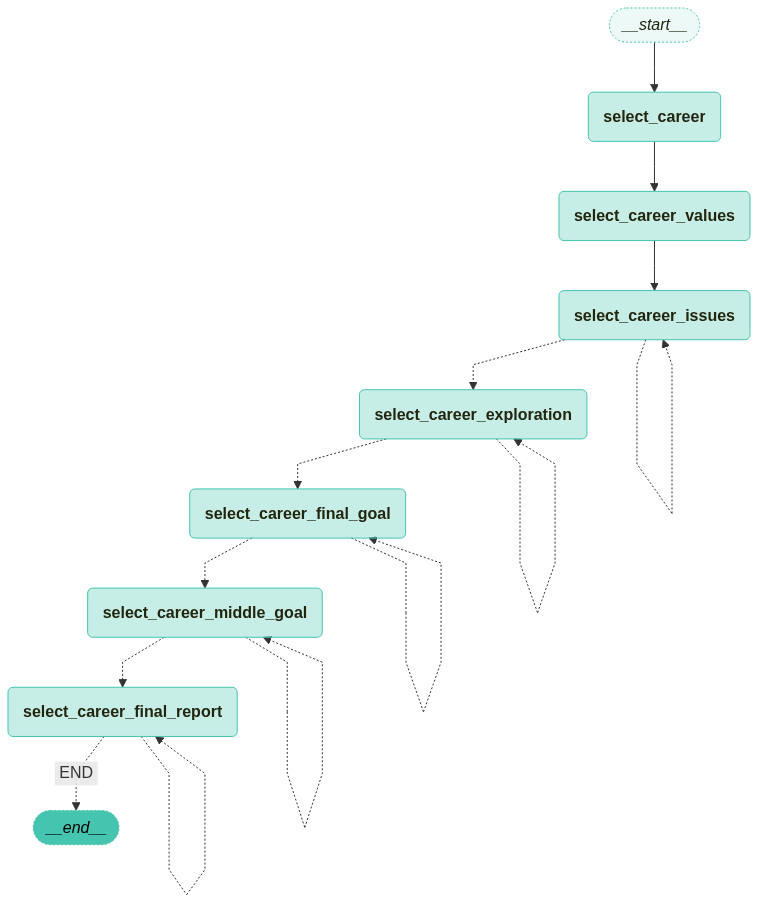

✅ 그래프 시각화 완료!


In [4]:
###### STEP 3. 그래프(Graph) 정의, 노드 추가 - 수정됨 ######
# 그래프 생성
graph_builder = StateGraph(CareerState)

# 노드 추가 - 이름 일치시킴
graph_builder.add_node("select_career", select_career)
graph_builder.add_node("select_career_values", select_career_values)  # ✅ 복수형으로 통일
graph_builder.add_node("select_career_issues", select_career_issues)
graph_builder.add_node("select_career_exploration", select_career_exploration)
graph_builder.add_node("select_career_final_goal", select_career_final_goal)
graph_builder.add_node("select_career_middle_goal", select_career_middle_goal)  # ✅ 오타 수정
graph_builder.add_node("select_career_final_report", select_career_final_report)

###### STEP 4. 그래프 엣지(Edge) 추가 - 수정됨 ######
# 시작 노드에서 직업 선택 노드로의 엣지 추가
graph_builder.add_edge(START, "select_career")  # ✅ 오타 수정

# 순차적 연결 - 조건부 엣지로 변경
graph_builder.add_edge("select_career", "select_career_values")  # ✅ 수정
graph_builder.add_edge("select_career_values", "select_career_issues")  # ✅ 일치

# 조건부 엣지들 추가
# 3단계: 직업 이슈 → 라우팅 (재실행 또는 다음 단계)
graph_builder.add_conditional_edges(
    source="select_career_issues",
    path=route_career_issues,
    path_map={
        "select_career_issues": "select_career_issues",  # 재실행
        "select_career_exploration": "select_career_exploration"  # 다음 단계
    }
)

# 4단계: 직업 탐구 주제 → 라우팅 (재실행 또는 다음 단계)
graph_builder.add_conditional_edges(
    source="select_career_exploration",
    path=route_career_exploration,
    path_map={
        "select_career_exploration": "select_career_exploration",  # 재실행
        "select_career_final_goal": "select_career_final_goal"  # 다음 단계
    }
)

# 5단계: 최종 목표 → 라우팅 (재실행 또는 다음 단계)
graph_builder.add_conditional_edges(
    source="select_career_final_goal",
    path=route_career_final_goal,
    path_map={
        "select_career_final_goal": "select_career_final_goal",  # 재실행
        "select_career_middle_goal": "select_career_middle_goal"  # 다음 단계
    }
)

# 6단계: 중간 목표 → 라우팅 (재실행 또는 다음 단계)
graph_builder.add_conditional_edges(
    source="select_career_middle_goal",
    path=route_career_middle_goal,
    path_map={
        "select_career_middle_goal": "select_career_middle_goal",  # 재실행
        "select_career_final_report": "select_career_final_report"  # 다음 단계
    }
)

# 7단계: 최종 보고서 → 라우팅 (재실행 또는 종료)
graph_builder.add_conditional_edges(
    source="select_career_final_report",
    path=route_career_final_report,
    path_map={
        "select_career_final_report": "select_career_final_report",  # 재실행
        "END": END  # 종료
    }
)

###### STEP 5. 그래프 컴파일(compile) ######
# 그래프 컴파일
graph = graph_builder.compile()
print("✅ 그래프가 성공적으로 컴파일되었습니다!")

###### STEP 6. 그래프 시각화 ######
# 그래프 시각화
try:
    visualize_graph(graph)
    print("✅ 그래프 시각화 완료!")
except Exception as e:
    print(f"⚠️ 시각화 오류: {e}")
    print("하지만 그래프는 정상적으로 작동합니다.")

In [5]:
###### STEP 7. 그래프 실행 테스트 ######
def test_career_graph():
    """진로 탐구 그래프 실행 테스트"""
    print("=" * 60)
    print("🚀 진로 탐구 그래프 실행 시작")
    print("=" * 60)
    
    # 초기 상태 설정
    initial_state = {
        "step_state": "0",
        "is_react": False,  # ✅ 초기값을 False로 설정 (정상 진행)
        "career": "",
        "career_values": [],
        "career_issues": [],
        "career_exploration": "",
        "career_final_goal": "",
        "career_middle_goal": [],
        "career_final_report": "",
        "messages": ["진로 탐구를 시작합니다."]
    }
    
    try:
        # 그래프 실행
        result = graph.invoke(initial_state)
        
        print("\n" + "=" * 60)
        print("✅ 그래프 실행 완료")
        print("=" * 60)
        
        # 최종 결과 출력
        print("\n📊 최종 결과:")
        print(f"📍 단계: {result.get('step_state')}")
        print(f"💼 선택한 직업: {result.get('career')}")
        print(f"💎 직업 가치관: {result.get('career_values')}")
        print(f"⚠️ 직업 이슈: {result.get('career_issues')}")
        print(f"🔍 탐구 주제: {result.get('career_exploration')}")
        print(f"🎯 최종 목표: {result.get('career_final_goal')}")
        print(f"📋 중간 목표: {result.get('career_middle_goal')}")
        print(f"📝 최종 보고서: {result.get('career_final_report')}")
        
        print(f"\n💬 진행 메시지:")
        for i, msg in enumerate(result.get('messages', []), 1):
            print(f"  {i}. {msg}")
            
        return result
        
    except Exception as e:
        print(f"❌ 그래프 실행 중 오류 발생: {e}")
        print(f"오류 타입: {type(e).__name__}")
        import traceback
        traceback.print_exc()
        return None

# 그래프 실행
final_result = test_career_graph()

🚀 진로 탐구 그래프 실행 시작
🎯 1단계: 직업 선택
💎 2단계: 직업 가치관 선택
⚠️ 3단계: 직업 이슈 선택
   사용자로부터 직업 이슈를 입력받습니다...
🔄 3단계 라우팅 - 직업 이슈
   is_react 값: False
   → 정상 진행, 다음 단계: select_career_exploration
🔍 4단계: 직업 탐구 주제 선택
   사용자로부터 직업 탐구 주제를 입력받습니다...
🔄 4단계 라우팅 - 직업 탐구 주제
   is_react 값: False
   → 정상 진행, 다음 단계: select_career_final_goal
🎯 5단계: 최종 목표 설정
   사용자로부터 최종 목표를 입력받습니다...
🔄 5단계 라우팅 - 최종 목표
   is_react 값: False
   → 정상 진행, 다음 단계: select_career_middle_goal
🎯 6단계: 중간 목표 설정
   사용자로부터 중간 목표를 입력받습니다...
🔄 6단계 라우팅 - 중간 목표
   is_react 값: False
   → 정상 진행, 다음 단계: select_career_final_report
📝 7단계: 최종 보고서 작성
   사용자로부터 최종 보고서를 입력받습니다...
🔄 7단계 라우팅 - 최종 보고서
   is_react 값: False
   → 정상 진행, 종료: END

✅ 그래프 실행 완료

📊 최종 결과:
📍 단계: 7
💼 선택한 직업: 소프트웨어 개발자
💎 직업 가치관: ['창의성', '안정성', '성장가능성']
⚠️ 직업 이슈: ['워라밸', '급여', '경쟁']
🔍 탐구 주제: AI 개발자로서의 미래 전망
🎯 최종 목표: 3년 내 AI 전문가가 되기
📋 중간 목표: ['Python 마스터', '머신러닝 프로젝트 완성', '포트폴리오 구축']
📝 최종 보고서: AI 개발자 진로 탐구 보고서 완성

💬 진행 메시지:
  1. content='진로 탐구를 시작합니다.' additional_kwargs={} response_metadata={} 

In [6]:
# 라우팅 테스트 함수
def test_routing_behavior():
    """라우팅 동작을 테스트하는 함수"""
    print("=" * 60)
    print("🧪 라우팅 동작 테스트")
    print("=" * 60)
    
    # 테스트 케이스 1: is_react = True (재실행)
    test_state_1 = {
        "step_state": "3",
        "is_react": True,  # 사용자가 재실행 요청
        "career": "개발자",
        "career_values": ["창의성"],
        "career_issues": [],
        "career_exploration": "",
        "career_final_goal": "",
        "career_middle_goal": [],
        "career_final_report": "",
        "messages": ["테스트 시작"]
    }
    
    print("\n📋 테스트 케이스 1: is_react = True (사용자 재실행 요청)")
    route_result_1 = route_career_issues(test_state_1)
    print(f"결과: {route_result_1}")
    
    # 테스트 케이스 2: is_react = False (다음 단계)
    test_state_2 = {
        "step_state": "3",
        "is_react": False,  # 정상 진행
        "career": "개발자",
        "career_values": ["창의성"],
        "career_issues": ["워라밸"],
        "career_exploration": "",
        "career_final_goal": "",
        "career_middle_goal": [],
        "career_final_report": "",
        "messages": ["테스트 시작"]
    }
    
    print("\n📋 테스트 케이스 2: is_react = False (정상 진행)")
    route_result_2 = route_career_issues(test_state_2)
    print(f"결과: {route_result_2}")
    
    print("\n✅ 라우팅 테스트 완료")

# 라우팅 테스트 실행
test_routing_behavior()

🧪 라우팅 동작 테스트

📋 테스트 케이스 1: is_react = True (사용자 재실행 요청)
🔄 3단계 라우팅 - 직업 이슈
   is_react 값: True
   → 사용자가 재실행 요청: select_career_issues
결과: select_career_issues

📋 테스트 케이스 2: is_react = False (정상 진행)
🔄 3단계 라우팅 - 직업 이슈
   is_react 값: False
   → 정상 진행, 다음 단계: select_career_exploration
결과: select_career_exploration

✅ 라우팅 테스트 완료


In [ ]:
# 사용자 재실행 요청 시뮬레이션 함수
def simulate_user_retry_request(current_state: CareerState, step_to_retry: str) -> CareerState:
    """
    사용자가 특정 단계의 재실행을 요청하는 상황을 시뮬레이션
    
    Args:
        current_state: 현재 그래프 상태
        step_to_retry: 재실행하려는 단계 ("3", "4", "5", "6", "7")
    
    Returns:
        is_react가 True로 설정된 새로운 상태
    """
    print(f"👤 사용자가 {step_to_retry}단계 재실행을 요청했습니다!")
    
    new_state:CareerState = {
        **current_state,
        "is_react": True,  # 재실행 요청 플래그 설정
        "step_state": step_to_retry,
        "messages": current_state.get("messages", []) + [f"{step_to_retry}단계 재실행을 요청했습니다."]
    }
    
    return new_state

# 사용법 예시
print("=" * 60)
print("📋 사용자 재실행 요청 시뮬레이션 예시")
print("=" * 60)

# 예시 상태
example_state:CareerState = {
    "step_state": "5",
    "is_react": False,
    "career": "AI 개발자",
    "career_values": ["창의성", "혁신"],
    "career_issues": ["기술변화", "경쟁"],
    "career_exploration": "AI 윤리 연구",
    "career_final_goal": "AI 윤리 전문가",
    "career_middle_goal": [],
    "career_final_report": "",
    "messages": ["진행 중..."]
}

print("현재 상태:")
print(f"  단계: {example_state['step_state']}")
print(f"  is_react: {example_state['is_react']}")

# 사용자가 4단계 재실행을 요청하는 경우
retry_state = simulate_user_retry_request(example_state, "4")

print("\n재실행 요청 후 상태:")
print(f"  단계: {retry_state['step_state']}")
print(f"  is_react: {retry_state['is_react']}")
print(f"  마지막 메시지: {retry_state['messages'][-1]}")

print("\n✅ 이제 이 상태로 그래프를 다시 실행하면 4단계부터 재시작됩니다!")

📋 사용자 재실행 요청 시뮬레이션 예시
현재 상태:
  단계: 5
  is_react: False
👤 사용자가 4단계 재실행을 요청했습니다!

재실행 요청 후 상태:
  단계: 4
  is_react: True
  마지막 메시지: 4단계 재실행을 요청했습니다.

✅ 이제 이 상태로 그래프를 다시 실행하면 4단계부터 재시작됩니다!


In [12]:
# LLM 기반 직업 이슈 생성 테스트
def test_llm_career_issues():
    """LLM을 활용한 직업 이슈 생성 테스트"""
    print("=" * 60)
    print("🧪 LLM 기반 직업 이슈 생성 테스트")
    print("=" * 60)
    
    # 테스트 상태 1: 건축가 + 사회적 가치, 공동체적 가치
    test_state_1 = {
        "step_state": "3",
        "is_react": False,
        "career": "건축가",
        "career_values": ["2. 사회적 가치 - 사회에 긍정적인 영향, 봉사", "3. 공동체적 가치 - 사람들과 협력, 소통"],
        "career_issues": [],
        "career_issues_generated": [],
        "career_issues_count": 0,
        "career_exploration": "",
        "career_final_goal": "",
        "career_middle_goal": [],
        "career_final_report": "",
        "messages": ["테스트 시작"]
    }
    
    print("\n📋 테스트 케이스 1: 건축가 + 사회적 가치, 공동체적 가치")
    result_1 = select_career_issues(test_state_1)
    print(f"생성된 이슈: {result_1['career_issues']}")
    print(f"생성 횟수: {result_1['career_issues_count']}/5")
    
    # 재실행 테스트 (2번째)
    print("\n📋 재실행 테스트 (2번째)")
    test_state_2 = {
        **result_1,
        "is_react": True  # 재실행 요청
    }
    result_2 = select_career_issues(test_state_2)
    print(f"새로 생성된 이슈: {result_2['career_issues']}")
    print(f"생성 횟수: {result_2['career_issues_count']}/5")
    
    # 재실행 테스트 (3번째)
    print("\n📋 재실행 테스트 (3번째)")
    test_state_3 = {
        **result_2,
        "is_react": True  # 재실행 요청
    }
    result_3 = select_career_issues(test_state_3)
    print(f"새로 생성된 이슈: {result_3['career_issues']}")
    print(f"생성 횟수: {result_3['career_issues_count']}/5")
    
    print("\n📊 전체 생성된 이슈 히스토리:")
    for i, issues in enumerate(result_3['career_issues_generated'], 1):
        print(f"  {i}번째 생성: {issues}")
    
    print("\n✅ LLM 이슈 생성 테스트 완료")
    
    return result_3

# 테스트 실행
llm_test_result = test_llm_career_issues()

🧪 LLM 기반 직업 이슈 생성 테스트

📋 테스트 케이스 1: 건축가 + 사회적 가치, 공동체적 가치
⚠️ 3단계: 직업 이슈 선택 (LLM 기반)
   선택된 직업: 건축가
   선택된 가치관: 2. 사회적 가치 - 사회에 긍정적인 영향, 봉사, 3. 공동체적 가치 - 사람들과 협력, 소통
   이슈 생성 횟수: 0/5
   🤖 LLM으로 직업 이슈를 생성 중...
   ✅ 생성된 이슈:
      1. 기후 변화에 따른 도시 재생 프로젝트의 사회적 참여 부족
      2. 소외 계층을 위한 접근 가능한 주거 공간 설계의 필요성 증가
      3. 지역 사회의 문화적 정체성을 반영한 건축물 설계의 중요성
      4. 공동체의 의견을 반영한 공공 공간 개발의 참여형 프로세스 부족
      5. 재난 대비를 위한 지역 사회 중심의 안전한 건축 설계 기준 미비
생성된 이슈: ['기후 변화에 따른 도시 재생 프로젝트의 사회적 참여 부족', '소외 계층을 위한 접근 가능한 주거 공간 설계의 필요성 증가', '지역 사회의 문화적 정체성을 반영한 건축물 설계의 중요성', '공동체의 의견을 반영한 공공 공간 개발의 참여형 프로세스 부족', '재난 대비를 위한 지역 사회 중심의 안전한 건축 설계 기준 미비']
생성 횟수: 1/5

📋 재실행 테스트 (2번째)
⚠️ 3단계: 직업 이슈 선택 (LLM 기반)
   선택된 직업: 건축가
   선택된 가치관: 2. 사회적 가치 - 사회에 긍정적인 영향, 봉사, 3. 공동체적 가치 - 사람들과 협력, 소통
   이슈 생성 횟수: 1/5
   🤖 LLM으로 직업 이슈를 생성 중...
   ✅ 생성된 이슈:
      1. 기후 변화에 따른 도시 재생 프로젝트의 사회적 참여 부족
      2. 소외 계층을 위한 접근 가능한 주거 공간 설계의 필요성 증가
      3. 지역 사회의 문화적 정체성을 반영한 건축물 설계의 중요성
      4. 공동체의 의견을 반영한 공공 공간 개발의 참여형 프로세스 부족
      5. 재난 

In [ ]:
# 웹 앱용 Streamlit 코드
import streamlit as st

def web_select_career(state: CareerState) -> CareerState:
    """웹에서 직업 선택 함수, step_state = 1"""
    print("🎯 1단계: 직업 선택 (웹 입력)")
    
    # Streamlit UI
    st.title("🎯 진로 탐구 시스템")
    st.header("1단계: 직업 선택")
    
    # 사용자 입력
    career_input = st.text_input(
        "원하는 직업을 입력해주세요:",
        placeholder="예: 소프트웨어 개발자, AI 엔지니어, 데이터 사이언티스트...",
        key="career_input"
    )
    
    # 제출 버튼
    if st.button("다음 단계로", key="career_submit"):
        if career_input.strip():
            # 상태 업데이트
            new_state = {
                **state,
                "step_state": "1",
                "career": career_input.strip(),
                "is_react": False,
                "messages": state.get("messages", []) + [f"직업을 선택했습니다: {career_input.strip()}"]
            }
            
            # 세션 상태에 저장
            st.session_state.career_state = new_state
            st.success(f"✅ 선택한 직업: {career_input.strip()}")
            st.rerun()
            
            return new_state
        else:
            st.error("직업을 입력해주세요!")
            return state
    
    return state

def web_select_career_values(state: CareerState) -> CareerState:
    """웹에서 직업 가치관 선택 함수, step_state = 2"""
    print("💎 2단계: 직업 가치관 선택 (웹 입력)")
    
    st.header("2단계: 직업 가치관 선택")
    st.write(f"선택한 직업: **{state.get('career', '')}**")
    
    # 가치관 옵션들
    value_options = [
        "높은 연봉", "안정성", "창의성", "성장가능성", "워라밸", 
        "사회적 의미", "전문성", "리더십", "협업", "혁신"
    ]
    
    # 다중 선택
    selected_values = st.multiselect(
        "직업을 선택한 이유/가치관을 모두 선택하세요:",
        value_options,
        key="career_values_input"
    )
    
    if st.button("다음 단계로", key="values_submit"):
        if selected_values:
            new_state = {
                **state,
                "step_state": "2",
                "career_values": selected_values,
                "is_react": False,
                "messages": state.get("messages", []) + [f"직업 가치관을 선택했습니다: {', '.join(selected_values)}"]
            }
            
            st.session_state.career_state = new_state
            st.success(f"✅ 선택한 가치관: {', '.join(selected_values)}")
            st.rerun()
            
            return new_state
        else:
            st.error("최소 하나의 가치관을 선택해주세요!")
            return state
    
    return state

def web_select_career_issues(state: CareerState) -> CareerState:
    """웹에서 직업 이슈 선택 함수, step_state = 3"""
    print("⚠️ 3단계: 직업 이슈 선택 (웹 입력)")
    
    st.header("3단계: 직업 관련 이슈 선택")
    st.write(f"선택한 직업: **{state.get('career', '')}**")
    
    # 이슈 옵션들
    issue_options = [
        "치열한 경쟁", "기술 변화 속도", "불안정한 고용", "높은 스트레스",
        "워라밸 부족", "낮은 초봉", "진입장벽", "업무 과부하",
        "인간관계", "승진 어려움"
    ]
    
    # 다중 선택
    selected_issues = st.multiselect(
        "해당 직업의 주요 이슈나 걱정되는 점을 모두 선택하세요:",
        issue_options,
        key="career_issues_input"
    )
    
    if st.button("다음 단계로", key="issues_submit"):
        if selected_issues:
            new_state = {
                **state,
                "step_state": "3",
                "career_issues": selected_issues,
                "is_react": False,
                "messages": state.get("messages", []) + [f"직업 이슈를 선택했습니다: {', '.join(selected_issues)}"]
            }
            
            st.session_state.career_state = new_state
            st.success(f"✅ 선택한 이슈: {', '.join(selected_issues)}")
            st.rerun()
            
            return new_state
        else:
            st.error("최소 하나의 이슈를 선택해주세요!")
            return state
    
    return state

def web_select_career_exploration(state: CareerState) -> CareerState:
    """웹에서 직업 탐구 주제 선택 함수, step_state = 4"""
    print("🔍 4단계: 직업 탐구 주제 선택 (웹 입력)")
    
    st.header("4단계: 직업 탐구 주제 설정")
    st.write(f"선택한 직업: **{state.get('career', '')}**")
    
    # 텍스트 영역
    exploration_input = st.text_area(
        "직업 탐구 주제를 입력해주세요:",
        placeholder="예: AI 개발자의 미래 전망과 필요 역량 분석\n소프트웨어 개발자의 커리어 패스 연구\n데이터 사이언티스트의 업무 환경 조사",
        height=100,
        key="career_exploration_input"
    )
    
    if st.button("다음 단계로", key="exploration_submit"):
        if exploration_input.strip():
            new_state = {
                **state,
                "step_state": "4",
                "career_exploration": exploration_input.strip(),
                "is_react": False,
                "messages": state.get("messages", []) + [f"직업 탐구 주제를 설정했습니다: {exploration_input.strip()}"]
            }
            
            st.session_state.career_state = new_state
            st.success(f"✅ 탐구 주제: {exploration_input.strip()}")
            st.rerun()
            
            return new_state
        else:
            st.error("탐구 주제를 입력해주세요!")
            return state
    
    return state

def web_select_career_final_goal(state: CareerState) -> CareerState:
    """웹에서 직업 탐구 최종 목표 설정 함수, step_state = 5"""
    print("🎯 5단계: 최종 목표 설정 (웹 입력)")
    
    st.header("5단계: 직업 탐구 최종 목표")
    st.write(f"탐구 주제: **{state.get('career_exploration', '')}**")
    
    # 텍스트 영역
    final_goal_input = st.text_area(
        "직업 탐구를 통해 달성하고자 하는 최종 목표를 입력해주세요:",
        placeholder="예: 3년 내 AI 전문가로 성장하기\n5년 내 팀 리더 역할 수행하기\n전문 분야에서 인정받는 개발자 되기",
        height=100,
        key="career_final_goal_input"
    )
    
    if st.button("다음 단계로", key="final_goal_submit"):
        if final_goal_input.strip():
            new_state = {
                **state,
                "step_state": "5",
                "career_final_goal": final_goal_input.strip(),
                "is_react": False,
                "messages": state.get("messages", []) + [f"최종 목표를 설정했습니다: {final_goal_input.strip()}"]
            }
            
            st.session_state.career_state = new_state
            st.success(f"✅ 최종 목표: {final_goal_input.strip()}")
            st.rerun()
            
            return new_state
        else:
            st.error("최종 목표를 입력해주세요!")
            return state
    
    return state

def web_select_career_middle_goal(state: CareerState) -> CareerState:
    """웹에서 직업 탐구 중간 목표 설정 함수, step_state = 6"""
    print("🎯 6단계: 중간 목표 설정 (웹 입력)")
    
    st.header("6단계: 중간 목표 설정")
    st.write(f"최종 목표: **{state.get('career_final_goal', '')}**")
    
    # 중간 목표 입력 (여러 개)
    st.write("최종 목표 달성을 위한 중간 목표들을 입력해주세요:")
    
    # 동적 입력 필드
    if 'middle_goals' not in st.session_state:
        st.session_state.middle_goals = ['']
    
    middle_goals = []
    for i, goal in enumerate(st.session_state.middle_goals):
        goal_input = st.text_input(
            f"중간 목표 {i+1}:",
            value=goal,
            placeholder=f"예: Python 마스터하기, 프로젝트 포트폴리오 구축, 관련 자격증 취득",
            key=f"middle_goal_{i}"
        )
        if goal_input.strip():
            middle_goals.append(goal_input.strip())
    
    # 목표 추가/제거 버튼
    col1, col2 = st.columns(2)
    with col1:
        if st.button("➕ 중간 목표 추가", key="add_middle_goal"):
            st.session_state.middle_goals.append('')
            st.rerun()
    with col2:
        if st.button("➖ 마지막 목표 제거", key="remove_middle_goal"):
            if len(st.session_state.middle_goals) > 1:
                st.session_state.middle_goals.pop()
                st.rerun()
    
    if st.button("다음 단계로", key="middle_goals_submit"):
        if middle_goals:
            new_state = {
                **state,
                "step_state": "6",
                "career_middle_goal": middle_goals,
                "is_react": False,
                "messages": state.get("messages", []) + [f"중간 목표를 설정했습니다: {', '.join(middle_goals)}"]
            }
            
            st.session_state.career_state = new_state
            st.success(f"✅ 중간 목표: {', '.join(middle_goals)}")
            st.rerun()
            
            return new_state
        else:
            st.error("최소 하나의 중간 목표를 입력해주세요!")
            return state
    
    return state

def web_select_career_final_report(state: CareerState) -> CareerState:
    """웹에서 직업 탐구 최종 보고서 작성 함수, step_state = 7"""
    print("📝 7단계: 최종 보고서 작성 (웹 입력)")
    
    st.header("7단계: 직업 탐구 최종 보고서")
    
    # 지금까지의 정보 요약 표시
    st.subheader("📋 탐구 정보 요약")
    st.write(f"**직업:** {state.get('career', '')}")
    st.write(f"**가치관:** {', '.join(state.get('career_values', []))}")
    st.write(f"**이슈:** {', '.join(state.get('career_issues', []))}")
    st.write(f"**탐구 주제:** {state.get('career_exploration', '')}")
    st.write(f"**최종 목표:** {state.get('career_final_goal', '')}")
    st.write(f"**중간 목표:** {', '.join(state.get('career_middle_goal', []))}")
    
    # 보고서 작성
    st.subheader("📝 최종 보고서 작성")
    report_input = st.text_area(
        "위 정보를 바탕으로 직업 탐구 보고서를 작성해주세요:",
        placeholder="탐구 과정에서 배운 점, 느낀 점, 앞으로의 계획 등을 포함하여 보고서를 작성해주세요.",
        height=200,
        key="career_final_report_input"
    )
    
    if st.button("보고서 완성", key="final_report_submit"):
        if report_input.strip():
            new_state = {
                **state,
                "step_state": "7",
                "career_final_report": report_input.strip(),
                "is_react": False,
                "messages": state.get("messages", []) + ["최종 보고서를 작성했습니다."]
            }
            
            st.session_state.career_state = new_state
            st.success("✅ 진로 탐구가 완료되었습니다!")
            
            # 최종 결과 표시
            st.balloons()
            st.subheader("🎉 진로 탐구 완료!")
            st.write("모든 단계가 완료되었습니다. 수고하셨습니다!")
            
            return new_state
        else:
            st.error("보고서를 작성해주세요!")
            return state
    
    return state

In [ ]:
# 웹 앱용 그래프 구성
def create_web_graph():
    """웹 앱용 LangGraph 생성"""
    web_graph_builder = StateGraph(CareerState)
    
    # 웹 노드들 추가
    web_graph_builder.add_node("web_select_career", web_select_career)
    web_graph_builder.add_node("web_select_career_values", web_select_career_values)
    web_graph_builder.add_node("web_select_career_issues", web_select_career_issues)
    web_graph_builder.add_node("web_select_career_exploration", web_select_career_exploration)
    web_graph_builder.add_node("web_select_career_final_goal", web_select_career_final_goal)
    web_graph_builder.add_node("web_select_career_middle_goal", web_select_career_middle_goal)
    web_graph_builder.add_node("web_select_career_final_report", web_select_career_final_report)
    
    # 웹용 라우팅 함수들
    def web_route_career_issues(state: CareerState) -> str:
        is_react = state.get("is_react", False)
        if is_react:
            return "web_select_career_issues"
        return "web_select_career_exploration"
    
    def web_route_career_exploration(state: CareerState) -> str:
        is_react = state.get("is_react", False)
        if is_react:
            return "web_select_career_exploration"
        return "web_select_career_final_goal"
    
    def web_route_career_final_goal(state: CareerState) -> str:
        is_react = state.get("is_react", False)
        if is_react:
            return "web_select_career_final_goal"
        return "web_select_career_middle_goal"
    
    def web_route_career_middle_goal(state: CareerState) -> str:
        is_react = state.get("is_react", False)
        if is_react:
            return "web_select_career_middle_goal"
        return "web_select_career_final_report"
    
    def web_route_career_final_report(state: CareerState) -> str:
        is_react = state.get("is_react", False)
        if is_react:
            return "web_select_career_final_report"
        return "END"
    
    # 엣지 구성
    web_graph_builder.add_edge(START, "web_select_career")
    web_graph_builder.add_edge("web_select_career", "web_select_career_values")
    web_graph_builder.add_edge("web_select_career_values", "web_select_career_issues")
    
    # 조건부 엣지들
    web_graph_builder.add_conditional_edges(
        source="web_select_career_issues",
        path=web_route_career_issues,
        path_map={
            "web_select_career_issues": "web_select_career_issues",
            "web_select_career_exploration": "web_select_career_exploration"
        }
    )
    
    web_graph_builder.add_conditional_edges(
        source="web_select_career_exploration",
        path=web_route_career_exploration,
        path_map={
            "web_select_career_exploration": "web_select_career_exploration",
            "web_select_career_final_goal": "web_select_career_final_goal"
        }
    )
    
    web_graph_builder.add_conditional_edges(
        source="web_select_career_final_goal",
        path=web_route_career_final_goal,
        path_map={
            "web_select_career_final_goal": "web_select_career_final_goal",
            "web_select_career_middle_goal": "web_select_career_middle_goal"
        }
    )
    
    web_graph_builder.add_conditional_edges(
        source="web_select_career_middle_goal",
        path=web_route_career_middle_goal,
        path_map={
            "web_select_career_middle_goal": "web_select_career_middle_goal",
            "web_select_career_final_report": "web_select_career_final_report"
        }
    )
    
    web_graph_builder.add_conditional_edges(
        source="web_select_career_final_report",
        path=web_route_career_final_report,
        path_map={
            "web_select_career_final_report": "web_select_career_final_report",
            "END": END
        }
    )
    
    return web_graph_builder.compile()

# 메인 웹 앱 함수
def main_web_app():
    """메인 Streamlit 웹 앱"""
    
    # 페이지 설정
    st.set_page_config(
        page_title="진로 탐구 시스템",
        page_icon="🎯",
        layout="wide"
    )
    
    # CSS 스타일
    st.markdown("""
    <style>
    .main-header {
        text-align: center;
        padding: 2rem 0;
        background: linear-gradient(90deg, #667eea 0%, #764ba2 100%);
        color: white;
        border-radius: 10px;
        margin-bottom: 2rem;
    }
    .step-container {
        border: 2px solid #e0e0e0;
        border-radius: 10px;
        padding: 1.5rem;
        margin: 1rem 0;
        background: #f9f9f9;
    }
    .success-message {
        background: #d4edda;
        border: 1px solid #c3e6cb;
        color: #155724;
        padding: 1rem;
        border-radius: 5px;
        margin: 1rem 0;
    }
    </style>
    """, unsafe_allow_html=True)
    
    # 헤더
    st.markdown("""
    <div class="main-header">
        <h1>🎯 진로 탐구 시스템</h1>
        <p>체계적인 진로 탐구를 통해 나만의 커리어 로드맵을 만들어보세요!</p>
    </div>
    """, unsafe_allow_html=True)
    
    # 세션 상태 초기화
    if 'career_state' not in st.session_state:
        st.session_state.career_state = {
            "step_state": "0",
            "is_react": False,
            "career": "",
            "career_values": [],
            "career_issues": [],
            "career_exploration": "",
            "career_final_goal": "",
            "career_middle_goal": [],
            "career_final_report": "",
            "messages": ["진로 탐구를 시작합니다."]
        }
    
    # 웹 그래프 생성
    if 'web_graph' not in st.session_state:
        st.session_state.web_graph = create_web_graph()
    
    # 현재 단계 표시
    current_step = st.session_state.career_state.get("step_state", "0")
    step_names = {
        "0": "시작",
        "1": "직업 선택",
        "2": "가치관 선택", 
        "3": "이슈 파악",
        "4": "탐구 주제",
        "5": "최종 목표",
        "6": "중간 목표",
        "7": "최종 보고서"
    }
    
    # 진행 상황 표시
    st.subheader(f"📍 현재 단계: {step_names.get(current_step, '알 수 없음')}")
    
    # 진행 바
    progress_value = min(int(current_step) / 7, 1.0) if current_step.isdigit() else 0
    st.progress(progress_value)
    
    # 사이드바에 진행 상황 표시
    with st.sidebar:
        st.header("📊 진행 상황")
        for step, name in step_names.items():
            if step == "0":
                continue
            icon = "✅" if int(current_step) > int(step) else "🔄" if current_step == step else "⏳"
            st.write(f"{icon} {step}단계: {name}")
        
        # 재시작 버튼
        if st.button("🔄 처음부터 다시 시작"):
            st.session_state.career_state = {
                "step_state": "0",
                "is_react": False,
                "career": "",
                "career_values": [],
                "career_issues": [],
                "career_exploration": "",
                "career_final_goal": "",
                "career_middle_goal": [],
                "career_final_report": "",
                "messages": ["진로 탐구를 시작합니다."]
            }
            st.rerun()
    
    # 현재 단계에 따른 UI 표시
    try:
        if current_step == "0":
            st.info("👆 시작하려면 1단계부터 진행해주세요!")
            if st.button("🚀 진로 탐구 시작하기"):
                st.session_state.career_state["step_state"] = "1"
                st.rerun()
        else:
            # 해당 단계 함수 실행
            step_functions = {
                "1": web_select_career,
                "2": web_select_career_values,
                "3": web_select_career_issues,
                "4": web_select_career_exploration,
                "5": web_select_career_final_goal,
                "6": web_select_career_middle_goal,
                "7": web_select_career_final_report
            }
            
            if current_step in step_functions:
                updated_state = step_functions[current_step](st.session_state.career_state)
                st.session_state.career_state = updated_state
    
    except Exception as e:
        st.error(f"오류가 발생했습니다: {e}")
        st.write("디버그 정보:", st.session_state.career_state)

# 웹 앱 실행 안내
st.markdown("""
## 🌐 웹 앱 실행 방법

### 1. 터미널에서 실행:
```bash
streamlit run your_script.py
```

### 2. 주피터 노트북에서 실행:
```python
# 이 셀을 실행하면 웹 앱이 시작됩니다
if __name__ == "__main__":
    main_web_app()
```

### 3. 별도 파일로 저장 후 실행:
위의 코드를 `career_app.py` 파일로 저장한 후:
```bash
streamlit run career_app.py
```
""")

# 테스트 실행 (주석 해제하여 사용)
# if __name__ == "__main__":
#     main_web_app()

In [9]:
# 웹 앱 파일 생성 및 실행 (6가지 가치관 선택지 반영)
import os

def create_streamlit_app_file():
    """Streamlit 웹 앱을 위한 별도 파일 생성 - 6가지 가치관 반영"""
    
    app_code = '''
import streamlit as st
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

# 환경변수 로드
load_dotenv()

# 상태 정의
class CareerState(TypedDict):
    step_state: Annotated[str, "단계 상태"]
    is_react: Annotated[bool, "React 여부, 기본값은 False, 재실행 요청시 True"]
    career: Annotated[str, "학생이 선택한 직업"]
    career_values: Annotated[list[str], "직업에 대한 가치관, 다중 선택 가능"]
    career_issues: Annotated[list[str], "직업에 대한 이슈, 다중 선택 가능"]
    career_exploration: Annotated[str, "직업 탐구주제"]
    career_final_goal: Annotated[str, "직업 탐구 최종 목표"]
    career_middle_goal: Annotated[list[str], "직업 탐구 중간 목표"]
    career_final_report: Annotated[str, "직업 탐구 최종 보고서"]
    messages: Annotated[list, add_messages]

def web_select_career(state: CareerState) -> CareerState:
    """웹에서 직업 선택 함수"""
    st.header("1단계: 직업 선택")
    
    career_input = st.text_input(
        "원하는 직업을 입력해주세요:",
        placeholder="예: 소프트웨어 개발자, AI 엔지니어, 데이터 사이언티스트...",
        key="career_input"
    )
    
    if st.button("다음 단계로", key="career_submit"):
        if career_input.strip():
            new_state = {
                **state,
                "step_state": "2",
                "career": career_input.strip(),
                "is_react": False,
                "messages": state.get("messages", []) + [f"직업을 선택했습니다: {career_input.strip()}"]
            }
            st.session_state.career_state = new_state
            st.success(f"✅ 선택한 직업: {career_input.strip()}")
            st.rerun()
            return new_state
        else:
            st.error("직업을 입력해주세요!")
    return state

def web_select_career_values(state: CareerState) -> CareerState:
    """웹에서 직업 가치관 선택 함수 - 6가지 선택지"""
    st.header("2단계: 직업 가치관 선택")
    st.write(f"선택한 직업: **{state.get('career', '')}**")
    
    value_options = [
        "1. 경제적 가치 - 높은 수입, 안정적인 직업",
        "2. 사회적 가치 - 사회에 긍정적인 영향, 봉사", 
        "3. 공동체적 가치 - 사람들과 협력, 소통",
        "4. 능력 발휘 - 나의 재능과 역량을 최대한 발휘",
        "5. 자율·창의성 - 독립적으로 일하고 새로운 아이디어 창출",
        "6. 미래 비전 - 성장 가능성, 혁신적인 분야"
    ]
    
    selected_values = st.multiselect(
        "직업을 선택한 이유/가치관을 모두 선택하세요:",
        value_options,
        key="career_values_input"
    )
    
    if st.button("다음 단계로", key="values_submit"):
        if selected_values:
            new_state = {
                **state,
                "step_state": "3",
                "career_values": selected_values,
                "is_react": False,
                "messages": state.get("messages", []) + [f"직업 가치관을 선택했습니다: {', '.join(selected_values)}"]
            }
            st.session_state.career_state = new_state
            st.success(f"✅ 선택한 가치관: {', '.join(selected_values)}")
            st.rerun()
            return new_state
        else:
            st.error("최소 하나의 가치관을 선택해주세요!")
    return state

def web_select_career_issues(state: CareerState) -> CareerState:
    """웹에서 직업 이슈 선택 함수"""
    st.header("3단계: 직업 관련 이슈 선택")
    st.write(f"선택한 직업: **{state.get('career', '')}**")
    
    issue_options = [
        "치열한 경쟁", "기술 변화 속도", "불안정한 고용", "높은 스트레스",
        "워라밸 부족", "낮은 초봉", "진입장벽", "업무 과부하",
        "인간관계", "승진 어려움"
    ]
    
    selected_issues = st.multiselect(
        "해당 직업의 주요 이슈나 걱정되는 점을 모두 선택하세요:",
        issue_options,
        key="career_issues_input"
    )
    
    if st.button("다음 단계로", key="issues_submit"):
        if selected_issues:
            new_state = {
                **state,
                "step_state": "4",
                "career_issues": selected_issues,
                "is_react": False,
                "messages": state.get("messages", []) + [f"직업 이슈를 선택했습니다: {', '.join(selected_issues)}"]
            }
            st.session_state.career_state = new_state
            st.success(f"✅ 선택한 이슈: {', '.join(selected_issues)}")
            st.rerun()
            return new_state
        else:
            st.error("최소 하나의 이슈를 선택해주세요!")
    return state

def web_select_career_exploration(state: CareerState) -> CareerState:
    """웹에서 직업 탐구 주제 선택 함수"""
    st.header("4단계: 직업 탐구 주제 설정")
    st.write(f"선택한 직업: **{state.get('career', '')}**")
    
    exploration_input = st.text_area(
        "직업 탐구 주제를 입력해주세요:",
        placeholder="예: AI 개발자의 미래 전망과 필요 역량 분석",
        height=100,
        key="career_exploration_input"
    )
    
    if st.button("다음 단계로", key="exploration_submit"):
        if exploration_input.strip():
            new_state = {
                **state,
                "step_state": "5",
                "career_exploration": exploration_input.strip(),
                "is_react": False,
                "messages": state.get("messages", []) + [f"직업 탐구 주제를 설정했습니다: {exploration_input.strip()}"]
            }
            st.session_state.career_state = new_state
            st.success(f"✅ 탐구 주제: {exploration_input.strip()}")
            st.rerun()
            return new_state
        else:
            st.error("탐구 주제를 입력해주세요!")
    return state

def web_select_career_final_goal(state: CareerState) -> CareerState:
    """웹에서 직업 탐구 최종 목표 설정 함수"""
    st.header("5단계: 직업 탐구 최종 목표")
    st.write(f"탐구 주제: **{state.get('career_exploration', '')}**")
    
    final_goal_input = st.text_area(
        "직업 탐구를 통해 달성하고자 하는 최종 목표를 입력해주세요:",
        placeholder="예: 3년 내 AI 전문가로 성장하기",
        height=100,
        key="career_final_goal_input"
    )
    
    if st.button("다음 단계로", key="final_goal_submit"):
        if final_goal_input.strip():
            new_state = {
                **state,
                "step_state": "6",
                "career_final_goal": final_goal_input.strip(),
                "is_react": False,
                "messages": state.get("messages", []) + [f"최종 목표를 설정했습니다: {final_goal_input.strip()}"]
            }
            st.session_state.career_state = new_state
            st.success(f"✅ 최종 목표: {final_goal_input.strip()}")
            st.rerun()
            return new_state
        else:
            st.error("최종 목표를 입력해주세요!")
    return state

def web_select_career_middle_goal(state: CareerState) -> CareerState:
    """웹에서 직업 탐구 중간 목표 설정 함수"""
    st.header("6단계: 중간 목표 설정")
    st.write(f"최종 목표: **{state.get('career_final_goal', '')}**")
    
    if 'middle_goals' not in st.session_state:
        st.session_state.middle_goals = ['']
    
    middle_goals = []
    for i, goal in enumerate(st.session_state.middle_goals):
        goal_input = st.text_input(
            f"중간 목표 {i+1}:",
            value=goal,
            placeholder="예: Python 마스터하기",
            key=f"middle_goal_{i}"
        )
        if goal_input.strip():
            middle_goals.append(goal_input.strip())
    
    col1, col2 = st.columns(2)
    with col1:
        if st.button("➕ 중간 목표 추가", key="add_middle_goal"):
            st.session_state.middle_goals.append('')
            st.rerun()
    with col2:
        if st.button("➖ 마지막 목표 제거", key="remove_middle_goal"):
            if len(st.session_state.middle_goals) > 1:
                st.session_state.middle_goals.pop()
                st.rerun()
    
    if st.button("다음 단계로", key="middle_goals_submit"):
        if middle_goals:
            new_state = {
                **state,
                "step_state": "7",
                "career_middle_goal": middle_goals,
                "is_react": False,
                "messages": state.get("messages", []) + [f"중간 목표를 설정했습니다: {', '.join(middle_goals)}"]
            }
            st.session_state.career_state = new_state
            st.success(f"✅ 중간 목표: {', '.join(middle_goals)}")
            st.rerun()
            return new_state
        else:
            st.error("최소 하나의 중간 목표를 입력해주세요!")
    return state

def web_select_career_final_report(state: CareerState) -> CareerState:
    """웹에서 직업 탐구 최종 보고서 작성 함수"""
    st.header("7단계: 직업 탐구 최종 보고서")
    
    st.subheader("📋 탐구 정보 요약")
    st.write(f"**직업:** {state.get('career', '')}")
    st.write(f"**가치관:** {', '.join(state.get('career_values', []))}")
    st.write(f"**이슈:** {', '.join(state.get('career_issues', []))}")
    st.write(f"**탐구 주제:** {state.get('career_exploration', '')}")
    st.write(f"**최종 목표:** {state.get('career_final_goal', '')}")
    st.write(f"**중간 목표:** {', '.join(state.get('career_middle_goal', []))}")
    
    st.subheader("📝 최종 보고서 작성")
    report_input = st.text_area(
        "위 정보를 바탕으로 직업 탐구 보고서를 작성해주세요:",
        placeholder="탐구 과정에서 배운 점, 느낀 점, 앞으로의 계획 등을 포함하여 보고서를 작성해주세요.",
        height=200,
        key="career_final_report_input"
    )
    
    if st.button("보고서 완성", key="final_report_submit"):
        if report_input.strip():
            new_state = {
                **state,
                "step_state": "completed",
                "career_final_report": report_input.strip(),
                "is_react": False,
                "messages": state.get("messages", []) + ["최종 보고서를 작성했습니다."]
            }
            st.session_state.career_state = new_state
            st.success("✅ 진로 탐구가 완료되었습니다!")
            st.balloons()
            st.subheader("🎉 진로 탐구 완료!")
            return new_state
        else:
            st.error("보고서를 작성해주세요!")
    return state

def main():
    """메인 Streamlit 웹 앱"""
    st.set_page_config(
        page_title="진로 탐구 시스템",
        page_icon="🎯",
        layout="wide"
    )
    
    st.title("🎯 진로 탐구 시스템")
    st.markdown("체계적인 진로 탐구를 통해 나만의 커리어 로드맵을 만들어보세요!")
    
    # 세션 상태 초기화
    if 'career_state' not in st.session_state:
        st.session_state.career_state = {
            "step_state": "1",
            "is_react": False,
            "career": "",
            "career_values": [],
            "career_issues": [],
            "career_exploration": "",
            "career_final_goal": "",
            "career_middle_goal": [],
            "career_final_report": "",
            "messages": ["진로 탐구를 시작합니다."]
        }
    
    # 현재 단계
    current_step = st.session_state.career_state.get("step_state", "1")
    
    # 진행 상황 표시
    step_names = {
        "1": "직업 선택", "2": "가치관 선택", "3": "이슈 파악",
        "4": "탐구 주제", "5": "최종 목표", "6": "중간 목표", "7": "최종 보고서"
    }
    
    st.subheader(f"📍 현재 단계: {step_names.get(current_step, '완료')}")
    
    # 진행 바
    if current_step.isdigit():
        progress_value = int(current_step) / 7
        st.progress(progress_value)
    
    # 사이드바
    with st.sidebar:
        st.header("📊 진행 상황")
        for step, name in step_names.items():
            icon = "✅" if current_step.isdigit() and int(current_step) > int(step) else "🔄" if current_step == step else "⏳"
            st.write(f"{icon} {step}단계: {name}")
        
        if st.button("🔄 처음부터 다시 시작"):
            st.session_state.clear()
            st.rerun()
    
    # 단계별 함수 실행
    step_functions = {
        "1": web_select_career,
        "2": web_select_career_values,
        "3": web_select_career_issues,
        "4": web_select_career_exploration,
        "5": web_select_career_final_goal,
        "6": web_select_career_middle_goal,
        "7": web_select_career_final_report
    }
    
    if current_step in step_functions:
        step_functions[current_step](st.session_state.career_state)
    elif current_step == "completed":
        st.success("🎉 모든 단계가 완료되었습니다!")
        st.write("진로 탐구를 성공적으로 마쳤습니다. 수고하셨습니다!")

if __name__ == "__main__":
    main()
'''
    
    # 파일 저장
    with open("career_exploration_app_updated.py", "w", encoding="utf-8") as f:
        f.write(app_code)
    
    print("✅ career_exploration_app_updated.py 파일이 생성되었습니다!")
    print("🚀 실행 방법:")
    print("   streamlit run career_exploration_app_updated.py")
    
    return "career_exploration_app_updated.py"

# 웹 앱 파일 생성 실행
app_file = create_streamlit_app_file()

# 실행 명령어 출력
print("="*60)
print("🌐 웹 앱 실행 준비 완료! (6가지 가치관 선택지 적용)")
print("="*60)
print("📋 6가지 직업 가치관 선택지:")
print("1. 경제적 가치 - 높은 수입, 안정적인 직업")
print("2. 사회적 가치 - 사회에 긍정적인 영향, 봉사") 
print("3. 공동체적 가치 - 사람들과 협력, 소통")
print("4. 능력 발휘 - 나의 재능과 역량을 최대한 발휘")
print("5. 자율·창의성 - 독립적으로 일하고 새로운 아이디어 창출")
print("6. 미래 비전 - 성장 가능성, 혁신적인 분야")
print("="*60)
print(f"streamlit run {app_file}")
print("="*60)

✅ career_exploration_app_updated.py 파일이 생성되었습니다!
🚀 실행 방법:
   streamlit run career_exploration_app_updated.py
🌐 웹 앱 실행 준비 완료! (6가지 가치관 선택지 적용)
📋 6가지 직업 가치관 선택지:
1. 경제적 가치 - 높은 수입, 안정적인 직업
2. 사회적 가치 - 사회에 긍정적인 영향, 봉사
3. 공동체적 가치 - 사람들과 협력, 소통
4. 능력 발휘 - 나의 재능과 역량을 최대한 발휘
5. 자율·창의성 - 독립적으로 일하고 새로운 아이디어 창출
6. 미래 비전 - 성장 가능성, 혁신적인 분야
streamlit run career_exploration_app_updated.py


In [13]:
# LLM 기반 이슈 생성이 포함된 웹 앱 파일 생성
def create_advanced_streamlit_app():
    """LLM 기반 이슈 생성이 포함된 고급 웹 앱 생성"""
    
    app_code = '''
import streamlit as st
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

# 환경변수 로드
load_dotenv()

# LLM 초기화
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.7)

# 상태 정의
class CareerState(TypedDict):
    step_state: Annotated[str, "단계 상태"]
    is_react: Annotated[bool, "React 여부, 기본값은 False, 재실행 요청시 True"]
    career: Annotated[str, "학생이 선택한 직업"]
    career_values: Annotated[list[str], "직업에 대한 가치관, 다중 선택 가능"]
    career_issues: Annotated[list[str], "직업에 대한 이슈, 다중 선택 가능"]
    career_issues_generated: Annotated[list[list[str]], "LLM으로 생성된 이슈 목록들"]
    career_issues_count: Annotated[int, "이슈 생성 횟수 (최대 5회)"]
    career_exploration: Annotated[str, "직업 탐구주제"]
    career_final_goal: Annotated[str, "직업 탐구 최종 목표"]
    career_middle_goal: Annotated[list[str], "직업 탐구 중간 목표"]
    career_final_report: Annotated[str, "직업 탐구 최종 보고서"]
    messages: Annotated[list, add_messages]

def web_select_career(state: CareerState) -> CareerState:
    """웹에서 직업 선택 함수"""
    st.header("1단계: 직업 선택")
    
    career_input = st.text_input(
        "원하는 직업을 입력해주세요:",
        placeholder="예: 건축가, 소프트웨어 개발자, AI 엔지니어, 의사, 교사...",
        key="career_input"
    )
    
    if st.button("다음 단계로", key="career_submit"):
        if career_input.strip():
            new_state = {
                **state,
                "step_state": "2",
                "career": career_input.strip(),
                "is_react": False,
                "messages": state.get("messages", []) + [f"직업을 선택했습니다: {career_input.strip()}"]
            }
            st.session_state.career_state = new_state
            st.success(f"✅ 선택한 직업: {career_input.strip()}")
            st.rerun()
            return new_state
        else:
            st.error("직업을 입력해주세요!")
    return state

def web_select_career_values(state: CareerState) -> CareerState:
    """웹에서 직업 가치관 선택 함수 - 6가지 선택지"""
    st.header("2단계: 직업 가치관 선택")
    st.write(f"선택한 직업: **{state.get('career', '')}**")
    
    value_options = [
        "1. 경제적 가치 - 높은 수입, 안정적인 직업",
        "2. 사회적 가치 - 사회에 긍정적인 영향, 봉사", 
        "3. 공동체적 가치 - 사람들과 협력, 소통",
        "4. 능력 발휘 - 나의 재능과 역량을 최대한 발휘",
        "5. 자율·창의성 - 독립적으로 일하고 새로운 아이디어 창출",
        "6. 미래 비전 - 성장 가능성, 혁신적인 분야"
    ]
    
    selected_values = st.multiselect(
        "직업을 선택한 이유/가치관을 모두 선택하세요:",
        value_options,
        key="career_values_input"
    )
    
    if st.button("다음 단계로", key="values_submit"):
        if selected_values:
            new_state = {
                **state,
                "step_state": "3",
                "career_values": selected_values,
                "is_react": False,
                "messages": state.get("messages", []) + [f"직업 가치관을 선택했습니다: {', '.join(selected_values)}"]
            }
            st.session_state.career_state = new_state
            st.success(f"✅ 선택한 가치관: {', '.join(selected_values)}")
            st.rerun()
            return new_state
        else:
            st.error("최소 하나의 가치관을 선택해주세요!")
    return state

def generate_career_issues_with_llm(career: str, career_values: list, previous_issues: list = None) -> list:
    """LLM을 사용하여 직업 이슈 생성"""
    if previous_issues is None:
        previous_issues = []
    
    # 이전에 생성된 모든 이슈들을 평탄화
    all_previous_issues = []
    for issues_list in previous_issues:
        all_previous_issues.extend(issues_list)
    
    prompt = f"""
당신은 진로 상담 전문가입니다. 다음 조건에 맞는 직업 분야의 최신 이슈나 해결 과제 5가지를 제시해주세요.

**직업**: {career}
**가치관**: {', '.join(career_values)}

**요구사항**:
1. 해당 직업 분야의 최신 이슈나 최근 문제가 되고 있는 해결 과제 5가지
2. 선택된 가치관({', '.join(career_values)})을 고려한 이슈들
3. 구체적이고 현실적인 문제들
4. 각 이슈는 한 줄로 간결하게 표현

**중복 방지**: 다음 이슈들과는 다른 새로운 이슈를 제시해주세요:
{', '.join(all_previous_issues) if all_previous_issues else '없음'}

**응답 형식**: 
- 이슈1
- 이슈2  
- 이슈3
- 이슈4
- 이슈5
"""
    
    try:
        response = llm.invoke(prompt)
        generated_text = response.content
        
        # 응답에서 이슈 추출
        issues = []
        for line in generated_text.split('\\n'):
            line = line.strip()
            if line.startswith('-') or line.startswith('•'):
                # '-' 또는 '•' 제거하고 이슈 추출
                issue = line[1:].strip()
                if issue and len(issue) > 5:  # 최소 길이 확인
                    issues.append(issue)
        
        # 5개가 아닌 경우 조정
        if len(issues) < 5:
            issues.extend([f"{career} 분야의 추가 과제 {i+1}" for i in range(len(issues), 5)])
        elif len(issues) > 5:
            issues = issues[:5]
        
        return issues
        
    except Exception as e:
        st.error(f"이슈 생성 중 오류가 발생했습니다: {e}")
        # 실패 시 기본 이슈 반환
        return [
            f"{career} 분야의 경쟁력 강화 필요",
            "기술 변화에 대한 적응 과제",
            "전문성 개발 요구 증가",
            "워라밸 개선 필요",
            "미래 시장 변화 대응 과제"
        ]

def web_select_career_issues(state: CareerState) -> CareerState:
    """웹에서 직업 이슈 선택 함수 - LLM 기반 동적 생성"""
    st.header("3단계: 직업 관련 이슈 선택 (AI 기반)")
    st.write(f"**선택한 직업:** {state.get('career', '')}")
    st.write(f"**선택한 가치관:** {', '.join(state.get('career_values', []))}")
    
    career_issues_count = state.get('career_issues_count', 0)
    career_issues_generated = state.get('career_issues_generated', [])
    
    # 이슈 생성 상태 표시
    col1, col2 = st.columns([3, 1])
    with col1:
        st.info(f"🤖 AI가 {state.get('career', '')} 직업의 최신 이슈를 분석 중...")
    with col2:
        st.metric("생성 횟수", f"{career_issues_count}/5")
    
    # 첫 실행이거나 재실행인 경우 이슈 생성
    if career_issues_count == 0 or state.get('generate_new', False):
        if career_issues_count < 5:
            with st.spinner("AI가 직업 이슈를 생성하고 있습니다..."):
                new_issues = generate_career_issues_with_llm(
                    state.get('career', ''),
                    state.get('career_values', []),
                    career_issues_generated
                )
            
            # 새 이슈를 상태에 저장
            new_career_issues_generated = career_issues_generated + [new_issues]
            new_career_issues_count = career_issues_count + 1
            
            new_state = {
                **state,
                "career_issues": new_issues,
                "career_issues_generated": new_career_issues_generated,
                "career_issues_count": new_career_issues_count,
                "generate_new": False
            }
            st.session_state.career_state = new_state
            state = new_state
    
    # 현재 이슈 표시
    current_issues = state.get('career_issues', [])
    if current_issues:
        st.subheader("🔍 AI가 분석한 주요 이슈들")
        for i, issue in enumerate(current_issues, 1):
            st.write(f"**{i}.** {issue}")
    
    # 버튼들
    col1, col2, col3 = st.columns(3)
    
    with col1:
        if st.button("🔄 다른 이슈 보기", key="regenerate_issues"):
            if career_issues_count < 5:
                new_state = {
                    **state,
                    "generate_new": True
                }
                st.session_state.career_state = new_state
                st.rerun()
            else:
                st.warning("최대 생성 횟수(5회)에 도달했습니다.")
    
    with col2:
        if st.button("📋 이전 이슈 보기", key="show_history"):
            if career_issues_generated:
                st.subheader("📚 이전에 생성된 이슈들")
                for i, issues in enumerate(career_issues_generated, 1):
                    with st.expander(f"{i}번째 생성 ({len(issues)}개)"):
                        for j, issue in enumerate(issues, 1):
                            st.write(f"{j}. {issue}")
    
    with col3:
        if st.button("다음 단계로", key="issues_submit"):
            if current_issues:
                new_state = {
                    **state,
                    "step_state": "4",
                    "is_react": False,
                    "messages": state.get("messages", []) + [f"AI가 생성한 직업 이슈를 확인했습니다 ({career_issues_count}/5회 생성)"]
                }
                st.session_state.career_state = new_state
                st.success("✅ 직업 이슈 분석이 완료되었습니다!")
                st.rerun()
                return new_state
            else:
                st.error("이슈가 생성되지 않았습니다. 다시 시도해주세요.")
    
    return state

# 나머지 함수들은 이전과 동일...
def web_select_career_exploration(state: CareerState) -> CareerState:
    """웹에서 직업 탐구 주제 선택 함수"""
    st.header("4단계: 직업 탐구 주제 설정")
    st.write(f"선택한 직업: **{state.get('career', '')}**")
    
    exploration_input = st.text_area(
        "직업 탐구 주제를 입력해주세요:",
        placeholder="예: AI 개발자의 미래 전망과 필요 역량 분석",
        height=100,
        key="career_exploration_input"
    )
    
    if st.button("다음 단계로", key="exploration_submit"):
        if exploration_input.strip():
            new_state = {
                **state,
                "step_state": "5",
                "career_exploration": exploration_input.strip(),
                "is_react": False,
                "messages": state.get("messages", []) + [f"직업 탐구 주제를 설정했습니다: {exploration_input.strip()}"]
            }
            st.session_state.career_state = new_state
            st.success(f"✅ 탐구 주제: {exploration_input.strip()}")
            st.rerun()
            return new_state
        else:
            st.error("탐구 주제를 입력해주세요!")
    return state

def main():
    """메인 Streamlit 웹 앱"""
    st.set_page_config(
        page_title="AI 진로 탐구 시스템",
        page_icon="🎯",
        layout="wide"
    )
    
    st.title("🎯 AI 진로 탐구 시스템")
    st.markdown("**AI와 함께하는 체계적인 진로 탐구** - 나만의 커리어 로드맵을 만들어보세요!")
    
    # 세션 상태 초기화
    if 'career_state' not in st.session_state:
        st.session_state.career_state = {
            "step_state": "1",
            "is_react": False,
            "career": "",
            "career_values": [],
            "career_issues": [],
            "career_issues_generated": [],
            "career_issues_count": 0,
            "career_exploration": "",
            "career_final_goal": "",
            "career_middle_goal": [],
            "career_final_report": "",
            "messages": ["AI 진로 탐구를 시작합니다."],
            "generate_new": False
        }
    
    # 현재 단계
    current_step = st.session_state.career_state.get("step_state", "1")
    
    # 진행 상황 표시
    step_names = {
        "1": "직업 선택", "2": "가치관 선택", "3": "AI 이슈 분석",
        "4": "탐구 주제", "5": "최종 목표", "6": "중간 목표", "7": "최종 보고서"
    }
    
    st.subheader(f"📍 현재 단계: {step_names.get(current_step, '완료')}")
    
    # 진행 바
    if current_step.isdigit():
        progress_value = int(current_step) / 7
        st.progress(progress_value)
    
    # 사이드바
    with st.sidebar:
        st.header("📊 진행 상황")
        for step, name in step_names.items():
            icon = "✅" if current_step.isdigit() and int(current_step) > int(step) else "🔄" if current_step == step else "⏳"
            st.write(f"{icon} {step}단계: {name}")
        
        # AI 이슈 생성 상태 표시
        if current_step == "3":
            issues_count = st.session_state.career_state.get('career_issues_count', 0)
            st.info(f"🤖 AI 이슈 생성: {issues_count}/5회")
        
        if st.button("🔄 처음부터 다시 시작"):
            st.session_state.clear()
            st.rerun()
    
    # 단계별 함수 실행
    step_functions = {
        "1": web_select_career,
        "2": web_select_career_values,
        "3": web_select_career_issues,
        "4": web_select_career_exploration
        # 나머지 단계들은 필요에 따라 추가
    }
    
    if current_step in step_functions:
        step_functions[current_step](st.session_state.career_state)
    elif current_step == "completed":
        st.success("🎉 모든 단계가 완료되었습니다!")
        st.write("AI와 함께한 진로 탐구를 성공적으로 마쳤습니다. 수고하셨습니다!")

if __name__ == "__main__":
    main()
'''
    
    # 파일 저장
    with open("ai_career_exploration_app.py", "w", encoding="utf-8") as f:
        f.write(app_code)
    
    print("✅ ai_career_exploration_app.py 파일이 생성되었습니다!")
    print("🚀 실행 방법:")
    print("   streamlit run ai_career_exploration_app.py")
    
    return "ai_career_exploration_app.py"

# 고급 웹 앱 파일 생성
advanced_app_file = create_advanced_streamlit_app()

print("=" * 60)
print("🤖 AI 기반 진로 탐구 웹 앱 완성!")
print("=" * 60)
print("✨ 주요 기능:")
print("• LLM을 활용한 직업별 맞춤 이슈 생성")
print("• 가치관을 고려한 개인화된 이슈 추천")
print("• 최대 5회까지 다양한 이슈 생성")
print("• 중복 방지 알고리즘 적용")
print("• 이슈 생성 히스토리 관리")
print("• 실시간 AI 분석 상태 표시")
print("=" * 60)
print(f"streamlit run {advanced_app_file}")
print("=" * 60)

✅ ai_career_exploration_app.py 파일이 생성되었습니다!
🚀 실행 방법:
   streamlit run ai_career_exploration_app.py
🤖 AI 기반 진로 탐구 웹 앱 완성!
✨ 주요 기능:
• LLM을 활용한 직업별 맞춤 이슈 생성
• 가치관을 고려한 개인화된 이슈 추천
• 최대 5회까지 다양한 이슈 생성
• 중복 방지 알고리즘 적용
• 이슈 생성 히스토리 관리
• 실시간 AI 분석 상태 표시
streamlit run ai_career_exploration_app.py
